In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

2.1
no it is not linear separable, as all the points are on one line! A hyperplane of a line is a point. there is no point that splits the data.

<Figure size 720x360 with 0 Axes>

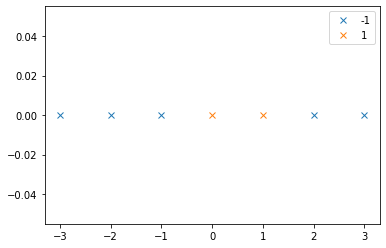

<Figure size 720x360 with 0 Axes>

In [2]:
x_1 = [-3,-2,-1,0,1,2,3]
y_1 = [-1,-1, -1,1,1,-1,-1]

x_2 = [-3, -2, -1, 2, 3]
x_2_2 = [9,4,1,4,9]
x_3 = [0, 1]
x_3_2 = [0, 1]
plt.plot(x_2, np.zeros(len(x_2)),'x', label = '-1')
plt.plot(x_3, np.zeros(len(x_3)),"x", label = '1')
plt.legend()
plt.figure(figsize=(10,5))

The output for the given x_k is,  2.368033988749895


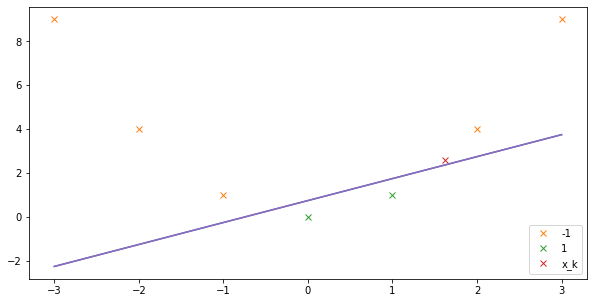

In [3]:
def fct(w1, w2, b, x):
    return w1 * x + w2 * x**2 + b

plt.figure(figsize=(10,5))

x_2 = [-3, -2, -1, 2, 3]
x_2_2 = [9, 4, 1, 4, 9]
x_3 = [0, 1]
x_3_2 = [0, 1]
x_k = (1 + (5) ** (1/2)) / 2
x = np.linspace(-3,3,100)
print("The output for the given x_k is, ", fct(1, 0, 0.75, x_k))

plt.plot(x, fct(1, 0, 0.75, x))
plt.plot(x_2, x_2_2, 'x', label= "-1")
plt.plot(x_3, x_3_2, 'x', label= "1")
plt.plot(x_k, x_k ** 2, 'x',label='x_k')
plt.plot(x, fct(1, 0, 0.75, x))
plt.legend()


Yes the Set is now linear separable!.

If yes, find a
separating hyperplane ⟨𝒘, 𝒙⟩ + 𝑏 = 0, compute its parameters1 and plot
it.

(1,0) * (x,x^2) + b = 0 


hyperplane:
w*x+b = 0

w = 1
b = 0.75

Using this parametrization for the line, we classify the point to belong to the classification -1.


# 3.1. Dataset Preprocessing

## Understanding the Dataset

In [4]:
# Read the dataset
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,0,33.6,0.627,50,1
1,1,85,66,29.0,0,26.6,0.351,31,0
2,8,183,64,0.0,0,23.3,0.672,32,1
3,1,89,66,23.0,94,28.1,0.167,21,0
4,0,137,40,35.0,168,43.1,2.288,33,1


In [5]:
print('number of samples in the dataset',dataset.shape[0])
print('number of features in the dataset',dataset.shape[1]-1)

number of samples in the dataset 768
number of features in the dataset 8


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             762 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       763 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


## Handling missing values in the dataset
Missing values represent incomplete information in a dataset. Removing null values ensures that the dataset is complete and ready for analysis or modeling. It prevents errors in machine learning models, which typically cannot handle missing data. There are various techniques to handle missing values in a dataset:


1.   Deleting rows with missing values
2.   Imputation techniques: Replacing the missong value with the mean, mode or median of the non-missing values in the respective feature.

choose one of the above methods to handle missing values in the dataset.



In [7]:
# Step 1: Print the count of null values in each column before removing
print("\nCount of null values in each column before removing:")
print(dataset.isnull().sum())

# Step 2: Remove rows with null values
dataset_cleaned = dataset.dropna()

# Step 3: Print the count of null values in each column after removing
print("\nCount of null values in each column after removing:")
print(dataset_cleaned.isnull().sum())


# Now proceed with the cleaned dataset in the following.
dataset = dataset_cleaned


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               6
Insulin                     0
BMI                         5
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Count of null values in each column before removing:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               6
Insulin                     0
BMI                         5
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Count of null values in each column after removing:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## Handling outliers in the dataset
An outlier is a data point that differs significantly from the majority of other points in a dataset. It is an unusually high or low value. In Particular,The SVM algorith is sensitive to outliers.The sensitivity of SVM to outliers stems from its reliance on support vectors to define the optimal hyperplane. Thus, outliers can substantially skew the positioning of the hyperplane. there are various methods to handle outliers. In this exercise, we want to first utilize box-plot based methods to visualize the data and identify the outliers. Then we will use IQR to remove the outliers. in the following paragraphs, we will explain these methods in detail.




**Understanding the Boxplot structure:**
A boxplot summarizes the distribution of data by showing the minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum values. It provides a clear visualization of the spread and skewness of the data, and any points lying outside the “whiskers” are considered potential outliers.


Lets display the boxplots for features in the dataset and identify the outliers:

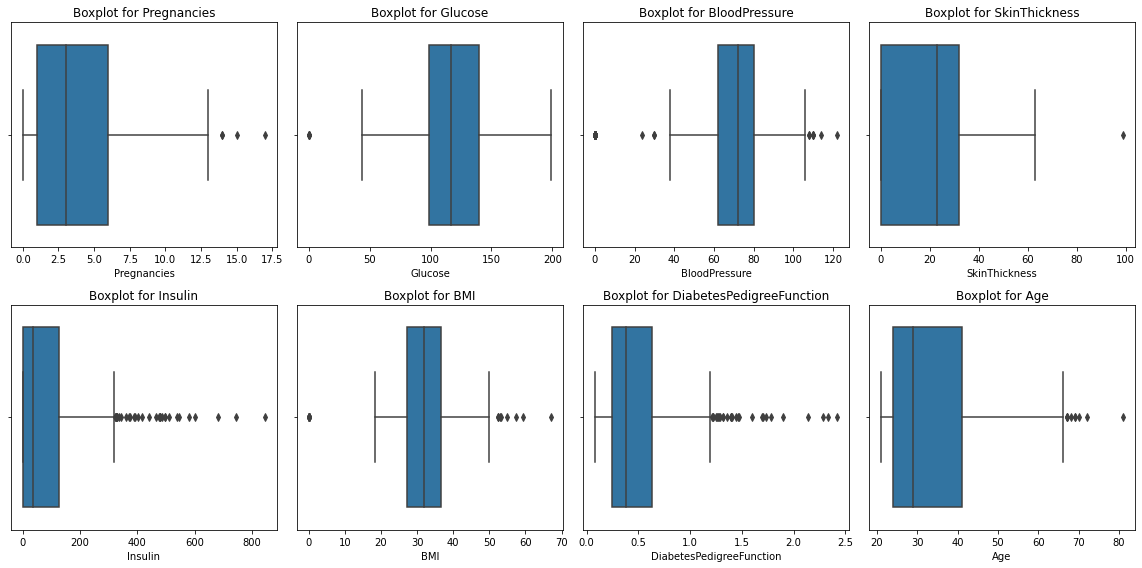

In [8]:
X = dataset.iloc[:,: - 1]

# Set up the subplot grid (4 columns, 2 rows)
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Flatten the axes array to make indexing easier
axes = axes.flatten()

# Plot a boxplot for each feature in the dataset (excluding the last column)
for i, column in enumerate(X.columns):
    sns.boxplot(x=X[column], ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')

# Adjust layout
plt.tight_layout()
plt.show()

This is how we can remove the outliers:
first  

1.   calculate the Q1 (25th percentile) and Q3 (75th percentile) for each column.
2.   compute the Interquartile Range (IQR). IQR (Interquartile Range) is the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of a dataset, representing the range where the middle 50% of the data lies.

3.   Using the IQR, define lower and upper bounds beyond which data points are considered outliers.





Column 'Pregnancies':
  Q1 (25th percentile): 1.0
  Q3 (75th percentile): 6.0
  IQR: 5.0
  Lower Bound: -6.5, Upper Bound: 13.5
  Defining the interval [-6.5, 13.5] for column 'Pregnancies'.
Column 'Glucose':
  Q1 (25th percentile): 99.0
  Q3 (75th percentile): 140.0
  IQR: 41.0
  Lower Bound: 37.5, Upper Bound: 201.5
  Defining the interval [37.5, 201.5] for column 'Glucose'.
Column 'BloodPressure':
  Q1 (25th percentile): 62.0
  Q3 (75th percentile): 80.0
  IQR: 18.0
  Lower Bound: 35.0, Upper Bound: 107.0
  Defining the interval [35.0, 107.0] for column 'BloodPressure'.
Column 'SkinThickness':
  Q1 (25th percentile): 0.0
  Q3 (75th percentile): 32.0
  IQR: 32.0
  Lower Bound: -48.0, Upper Bound: 80.0
  Defining the interval [-48.0, 80.0] for column 'SkinThickness'.
Column 'Insulin':
  Q1 (25th percentile): 0.0
  Q3 (75th percentile): 128.0
  IQR: 128.0
  Lower Bound: -192.0, Upper Bound: 320.0
  Defining the interval [-192.0, 320.0] for column 'Insulin'.
Column 'BMI':
  Q1 (25th per

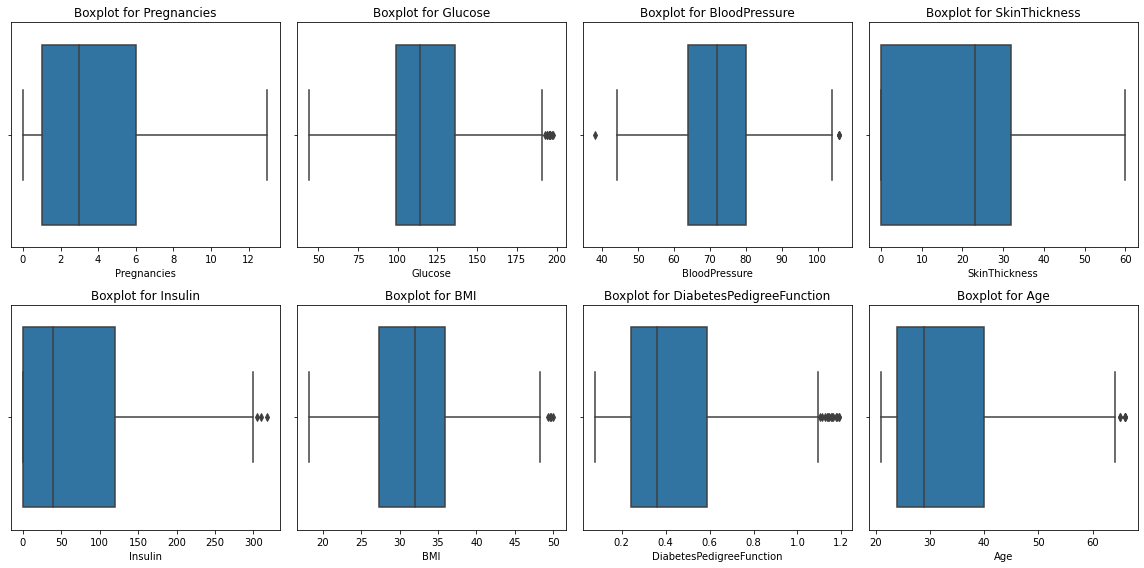

In [9]:
# Calculate Q1 and Q2 for each column
#Calculate the lower and upper bounds for each column


#Keep only rows where all columns are within bounds
for i, column in enumerate(X.columns):
    # Calculate Q1 and Q3 for each column in X
    Q1 = X[column].quantile(0.25)
    Q3 = X[column].quantile(0.75)
    
    # Calculate IQR for the current column
    IQR = Q3 - Q1
    
    # Calculate lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Print information about Q1, Q3, and IQR for each column
    print(f"Column '{column}':")
    print(f"  Q1 (25th percentile): {Q1}")
    print(f"  Q3 (75th percentile): {Q3}")
    print(f"  IQR: {IQR}")
    print(f"  Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print(f"  Defining the interval [{lower_bound}, {upper_bound}] for column '{column}'.")
    
    # Filter dataset to keep only the rows where values in the current column are within bounds
    #X = X[(X[column] >= lower_bound) & (X[column] <= upper_bound)]
    dataset = dataset[(dataset[column] >= lower_bound) & (dataset[column] <= upper_bound)]

dataset.info()
X = dataset.iloc[:,: - 1]

# Set up the subplot grid (4 columns, 2 rows)
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Flatten the axes array to make indexing easier
axes = axes.flatten()

# Plot a boxplot for each feature in the dataset (excluding the last column)
for i, column in enumerate(X.columns):
    sns.boxplot(x=X[column], ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')

# Adjust layout
plt.tight_layout()
plt.show()
    

## Standardization
Standardize the features values to have a mean of zero and standard deviation of 1. This ensures that all features contribute equally to the model

In [26]:
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

X.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 630 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               630 non-null    int64  
 1   Glucose                   630 non-null    int64  
 2   BloodPressure             630 non-null    int64  
 3   SkinThickness             630 non-null    float64
 4   Insulin                   630 non-null    int64  
 5   BMI                       630 non-null    float64
 6   DiabetesPedigreeFunction  630 non-null    float64
 7   Age                       630 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 64.3 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35.0,0,33.6,0.627,50
1,1,85,66,29.0,0,26.6,0.351,31
2,8,183,64,0.0,0,23.3,0.672,32
3,1,89,66,23.0,94,28.1,0.167,21
5,5,116,74,0.0,0,25.6,0.201,30


In [31]:
from sklearn.preprocessing import StandardScaler

# Standardize the feature values (X)
scaler = StandardScaler()

# Fit the scaler to the feature data and transform the features
X_scaled = scaler.fit_transform(X)  

# Convert the scaled features back to a DataFrame, keeping the original column names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# If you still want to include Y in the dataset, concatenate it
dataset_scaled = pd.concat([X_scaled_df, Y], axis=1)

# Print the count of NaN values in each column after scaling
print(dataset_scaled.isna().sum())

dataset_scaled.info()


Pregnancies                 120
Glucose                     120
BloodPressure               120
SkinThickness               120
Insulin                     120
BMI                         120
DiabetesPedigreeFunction    120
Age                         120
Outcome                     120
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 750 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               630 non-null    float64
 1   Glucose                   630 non-null    float64
 2   BloodPressure             630 non-null    float64
 3   SkinThickness             630 non-null    float64
 4   Insulin                   630 non-null    float64
 5   BMI                       630 non-null    float64
 6   DiabetesPedigreeFunction  630 non-null    float64
 7   Age                       630 non-null    float64
 8   Outcome                   630 non-null  

In [33]:
# Standardize the feature values (X)
scaler = StandardScaler()

# Fit the scaler to the feature data and transform the features
X_scaled = scaler.fit_transform(X)  # X is your feature matrix

# Convert the scaled features back to a DataFrame, keeping the original column names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# If you still want to include Y in the dataset, concatenate it
dataset_scaled = pd.concat([X_scaled_df, Y], axis=1)  # Y is your target variable

print("Missing values in the dataset after scaling:")
print(dataset_cleaned.isna().sum())

dataset_scaled_cleaned = dataset_scaled.dropna()


# Print the count of NaN values in each column after scaling
print("Missing values in the dataset after scaling:")
print(dataset_scaled_cleaned.isna().sum())

Missing values in the dataset after scaling:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Missing values in the dataset after scaling:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## Split the data into train and test

In [34]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets.
# Use 80% of the data for training and 20% for testing.

X = dataset_scaled_cleaned.iloc[:, :-1]  # Features (excluding the target column)
Y = dataset_scaled_cleaned.iloc[:, -1]   # Target variable (usually the last column)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8)

X_train_df = pd.DataFrame(X_train, columns=X.columns)
data_train = pd.concat([X_train_df, Y_train], axis=1)

X_test_df = pd.DataFrame(X_test, columns=X.columns)
data_test = pd.concat([X_test_df, Y_test], axis=1)



# 3.2. Train a linear svm and report its accuracy

In [35]:
from sklearn import svm
from sklearn.metrics import accuracy_score

#Fit a linear svm on train data
model = svm.SVC(kernel='linear')
# Fit the model on the training data
model.fit(X_train, Y_train)

# TODO: Report the accuracy on the training data
train_predictions = model.predict(X_train)  # Predictions on the training data
train_accuracy = accuracy_score(Y_train, train_predictions)  # Accuracy on the training data

print("Training Accuracy:", train_accuracy)

# TODO: Report the accuracy on the test data
test_predictions = model.predict(X_test)  # Predictions on the test data
test_accuracy = accuracy_score(Y_test, test_predictions)  # Accuracy on the test data

print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.6936274509803921
Test Accuracy: 0.7156862745098039


# 3.3. Use nonlinear kernels and report model accuracy


In [36]:
from sklearn import svm
from sklearn.metrics import accuracy_score

#Fit a linear svm on train data
model = svm.NuSVC(gamma="auto")
# Fit the model on the training data
model.fit(X_train, Y_train)

# TODO: Report the accuracy on the training data
train_predictions = model.predict(X_train)  # Predictions on the training data
train_accuracy = accuracy_score(Y_train, train_predictions)  # Accuracy on the training data

print("Training Accuracy:", train_accuracy)

# TODO: Report the accuracy on the test data
test_predictions = model.predict(X_test)  # Predictions on the test data
test_accuracy = accuracy_score(Y_test, test_predictions)  # Accuracy on the test data

print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.8774509803921569
Test Accuracy: 0.5294117647058824


Question: Did nonlinear kernels improve accuracy?
No it did not, however, for me it also seems strange, that I have to cut off data points after transformation ?

# 3.4. **Next Mile:** Find the best Hyperparameters automatically
you can use Grid Search in scikit learn to explore different hyperparameter combinations and find the best ones. Let's implemenet it step by step!

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}


In [43]:
# TODO: Initialize the SVM classifier
svc = svm.SVC()

# TODO: Initialize GridSearchCV with cross-validation
clf = GridSearchCV(svc, param_grid)

# TODO: Fit grid search
clf.fit(X_train, Y_train)

# TODO: Print the best parameters and best score
print("Best parameters:", clf.best_params_)  # Print the best combination of hyperparameters
print("Best cross-validation score:", clf.best_score_)  # Print the best cross-validation score

# TODO: Use the best estimator to make predictions
train_predictions = clf.predict(X_train)  # Predictions on the training data
test_predictions = clf.predict(X_test)

# TODO: Report the Accuracy on Train data
train_accuracy = accuracy_score(Y_train, train_predictions)  # Accuracy on the training data
print("Training Accuracy:", train_accuracy)

# TODO: Report the Accuracy on Test data
test_accuracy = accuracy_score(Y_test, test_predictions)  # Accuracy on the test data
print("Test Accuracy:", test_accuracy)

Best parameters: {'C': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.6936163806082505
Training Accuracy: 0.6936274509803921
Test Accuracy: 0.7156862745098039
